In [2]:
#Se importan la librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
#import quandl
#import pandas_datareader.data as web
import datetime
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.core import datetools

#Lectura del archivo .csv para manipular la data
f = open('predict_MSFT.csv','rU')
acciones = pd.read_csv(f , parse_dates = True, index_col = 0)  #analiza la columna 0 como fechas
acciones

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1986-03-13,25.500,29.2500,25.500,28.00,3582600.0,0.00,1.0,0.058190,0.066748,0.058190,0.063895,1.031789e+09
1986-03-14,28.000,29.5000,28.000,29.00,1070000.0,0.00,1.0,0.063895,0.067318,0.063895,0.066177,3.081600e+08
1986-03-17,29.000,29.7500,29.000,29.50,462400.0,0.00,1.0,0.066177,0.067889,0.066177,0.067318,1.331712e+08
1986-03-18,29.500,29.7500,28.500,28.75,235300.0,0.00,1.0,0.067318,0.067889,0.065036,0.065607,6.776640e+07
1986-03-19,28.750,29.0000,28.000,28.25,166300.0,0.00,1.0,0.065607,0.066177,0.063895,0.064466,4.789440e+07
1986-03-20,28.250,28.2500,27.250,27.50,202900.0,0.00,1.0,0.064466,0.064466,0.062184,0.062754,5.843520e+07
1986-03-21,27.500,28.0000,26.250,26.75,208300.0,0.00,1.0,0.062754,0.063895,0.059902,0.061043,5.999040e+07
1986-03-24,26.750,26.7500,25.750,26.00,226700.0,0.00,1.0,0.061043,0.061043,0.058761,0.059331,6.528960e+07
1986-03-25,26.000,26.5000,25.750,26.50,111400.0,0.00,1.0,0.059331,0.060472,0.058761,0.060472,3.208320e+07


In [3]:
acciones.index.sort_values()

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-17', '2018-09-18', '2018-09-19',
               '2018-09-20', '2018-09-21'],
              dtype='datetime64[ns]', name=u'Date', length=8201, freq=None)

In [4]:
# Convert index to pandas datetime
acciones.index = pd.to_datetime(acciones.index, format="%Y/%m/%d")

In [5]:
acciones_final = acciones.drop(['Open','High','Low','Volume'], axis=1)

In [6]:
# Conver to Series to run Dickey-Fuller test
acciones_final = pd.Series(acciones_final['Close'])

In [7]:
type(acciones_final)

pandas.core.series.Series

In [8]:
def check_stationarity(ts_data):
    
    # Rolling statistics
    roll_mean = ts_data.rolling(30).mean()
    roll_std = ts_data.rolling(5).std()
    
    # Plot rolling statistics
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(ts_data, color='black', label='Original Data')
    plt.plot(roll_mean, color='red', label='Rolling Mean(30 days)')
    plt.legend()
    plt.subplot(212)
    plt.plot(roll_std, color='green', label='Rolling Std Dev(5 days)')
    plt.legend()
    
    # Dickey-Fuller test
    print('Dickey-Fuller test results\n')
    acciones_test = adfuller(ts_data, regresults=False)
    test_result = pd.Series(acciones_test[0:4], index=['Test Statistic','p-value','# of lags','# of obs'])
    print(test_result)
    for k,v in acciones_test[4].items():
        print('Critical value at %s: %1.5f' %(k,v))

Dickey-Fuller test results

Test Statistic      -3.173399
p-value              0.021577
# of lags            4.000000
# of obs          8196.000000
dtype: float64
Critical value at 5%: -2.86189
Critical value at 1%: -3.43115
Critical value at 10%: -2.56696


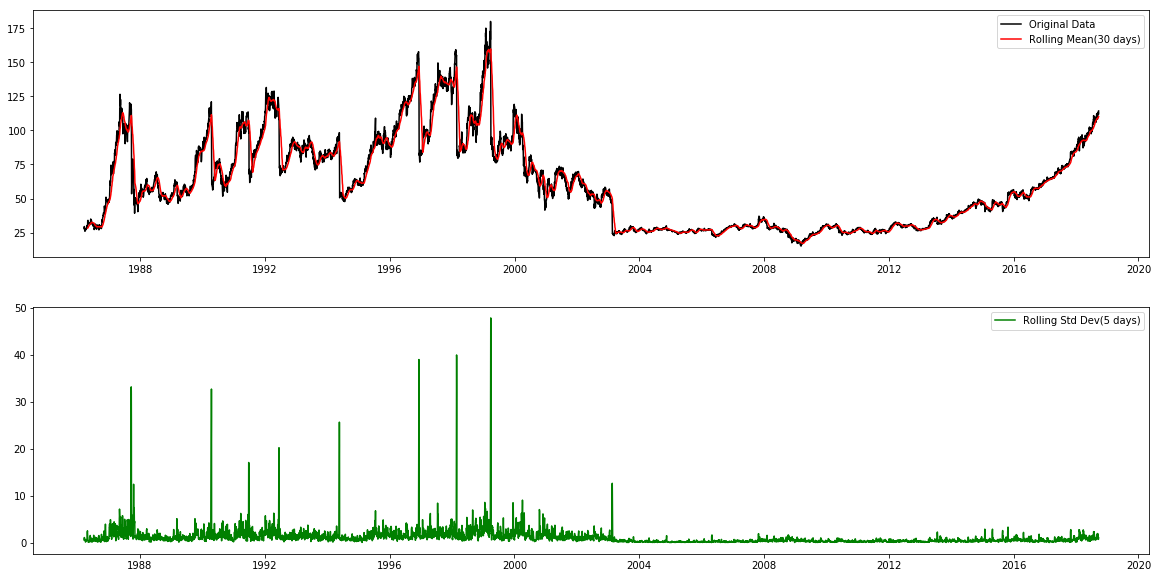

In [9]:
check_stationarity(acciones_final)

In [10]:
#Como la estadística de prueba es mayor que todos los valores críticos, 
#la serie de tiempo claramente no es estacionaria. 
#Se requieren pruebas de transformaciones diferentes para la estacionariedad antes de aplicar el modelo ARIMAa series de tiempo.
# Log transform time series
acciones_final_log = np.log(acciones_final)
acciones_final_log.head()

Date
1986-03-13    3.332205
1986-03-14    3.367296
1986-03-17    3.384390
1986-03-18    3.358638
1986-03-19    3.341093
Name: Close, dtype: float64

Dickey-Fuller test results

Test Statistic      -2.194139
p-value              0.208379
# of lags            3.000000
# of obs          8197.000000
dtype: float64
Critical value at 5%: -2.86189
Critical value at 1%: -3.43115
Critical value at 10%: -2.56696


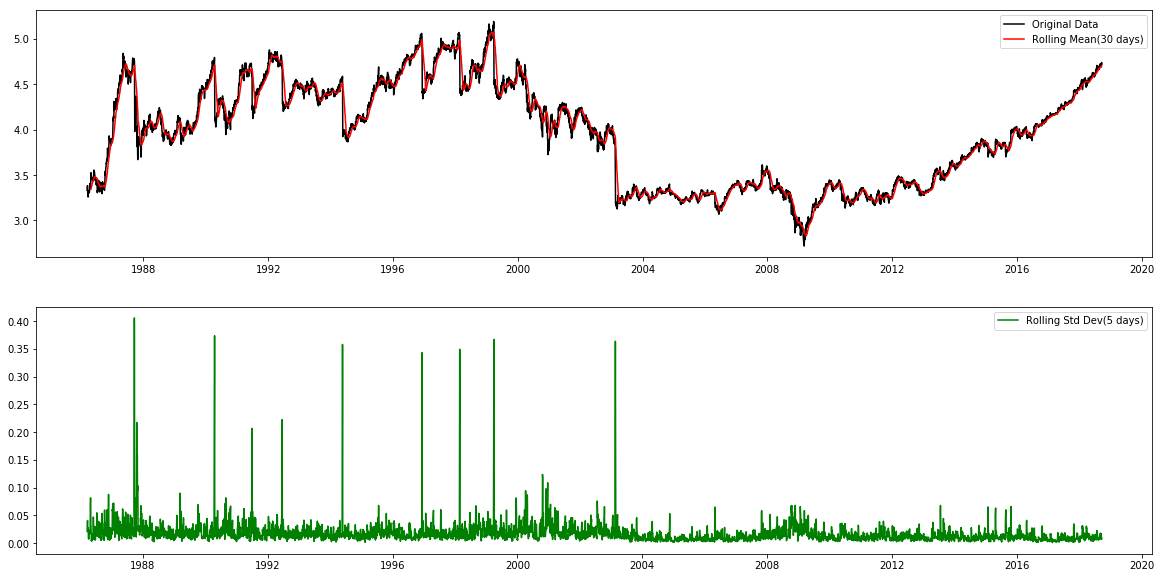

In [11]:
# Check stationarity
acciones_final_log.dropna(inplace=True)
check_stationarity(acciones_final_log)

In [ ]:
#La transformación de registro no es estacionaria ya que la estadística de prueba es mayor que los valores críticos 
#y también puede visualizar esto en el primer gráfico

In [12]:
#Log diferenciando transformación de series de tiempo originales
# Log Differencing
acciones_final_log_diff = acciones_final_log - acciones_final_log.shift()

Dickey-Fuller test results

Test Statistic     -54.64704
p-value              0.00000
# of lags            2.00000
# of obs          8197.00000
dtype: float64
Critical value at 5%: -2.86189
Critical value at 1%: -3.43115
Critical value at 10%: -2.56696


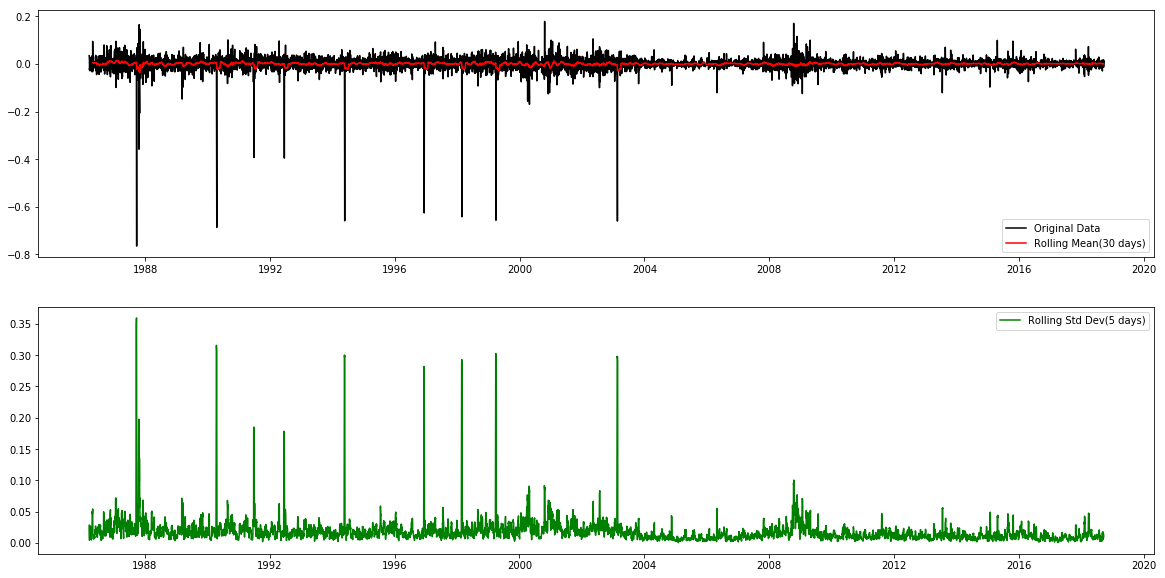

In [13]:
acciones_final_log_diff.dropna(inplace=True)
check_stationarity(acciones_final_log_diff)

In [14]:
#Transformación de diferenciación simple de series de tiempo originales
# Differencing
acciones_final_diff = acciones_final - acciones_final.shift()

Dickey-Fuller test results

Test Statistic     -45.671979
p-value              0.000000
# of lags            3.000000
# of obs          8196.000000
dtype: float64
Critical value at 5%: -2.86189
Critical value at 1%: -3.43115
Critical value at 10%: -2.56696


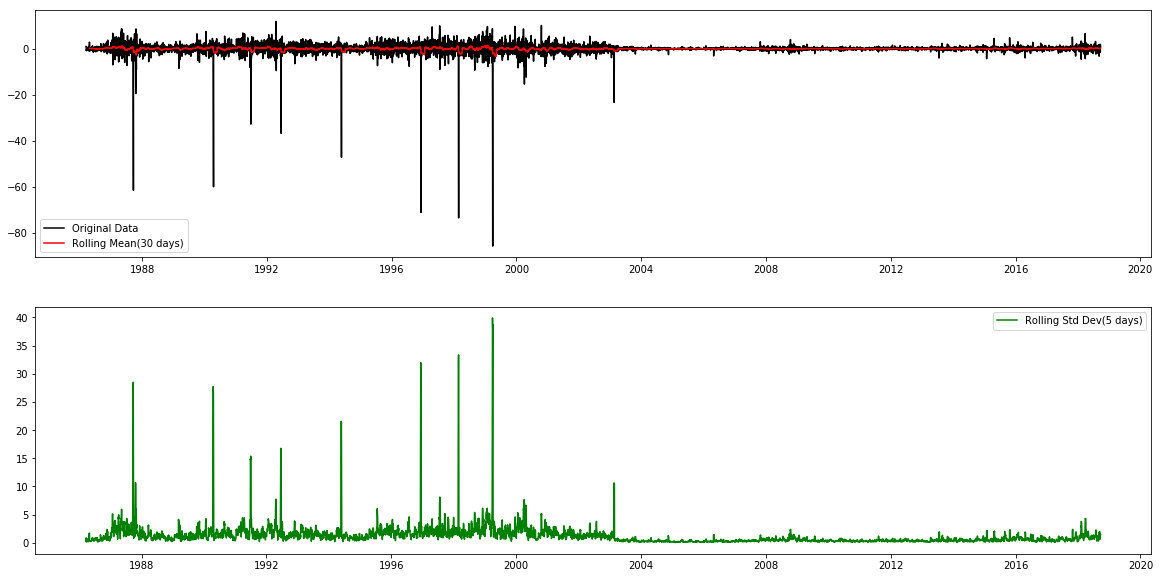

In [15]:
acciones_final_diff.dropna(inplace=True)
check_stationarity(acciones_final_diff)

In [16]:
#Como la diferenciación simple produce una estadística de prueba mucho más baja que los valores críticos, 
#la utilizaremos para aplicar ARIMA
from statsmodels.tsa.stattools import acf, pacf

In [17]:
acciones_acf = acf(acciones_final_diff)

In [18]:
acciones_pacf = pacf(acciones_final_diff)

In [19]:
import statsmodels.api as sm

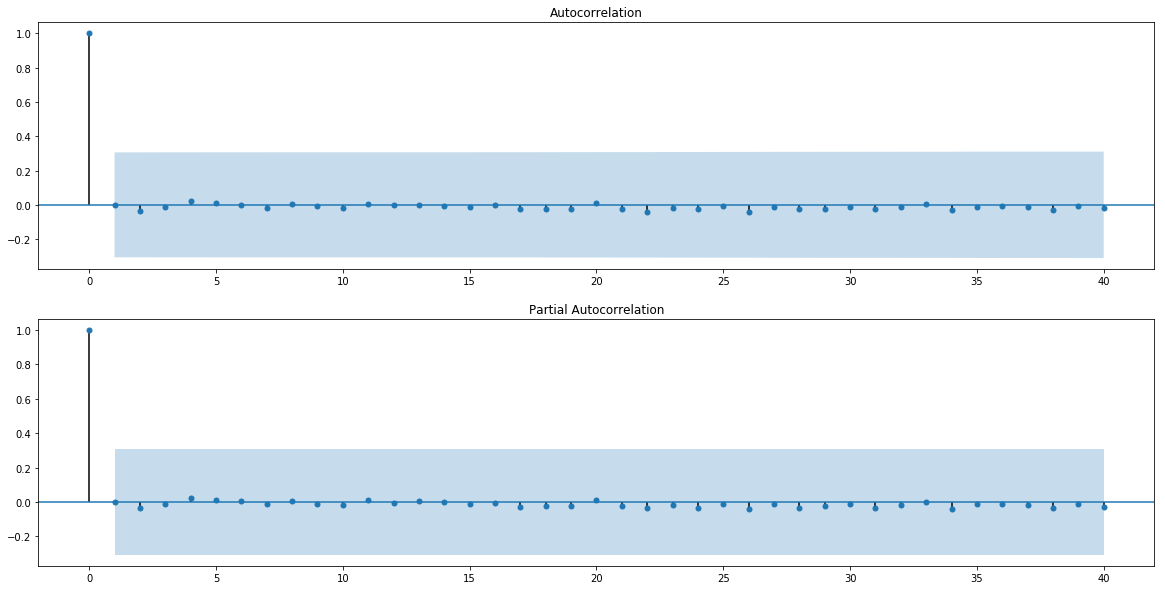

In [20]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(211)
fig1 = sm.graphics.tsa.plot_acf(acciones_acf, ax=ax1)
ax2 = fig1.add_subplot(212)
fig1 = sm.graphics.tsa.plot_pacf(acciones_pacf, ax=ax2)

In [21]:
model = ARIMA(acciones_final_diff, (1,1,0))

In [22]:
fit_model = model.fit(full_output=True)

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [23]:
predictions = model.predict(fit_model.params, start=1760, end=1769)

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [24]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 8199
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -20784.095
Method:                       css-mle   S.D. of innovations              3.053
Date:                Thu, 27 Sep 2018   AIC                          41574.190
Time:                        04:22:28   BIC                          41595.225
Sample:                    03-17-1986   HQIC                         41581.381
                         - 09-21-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.884e-05      0.023      0.001      0.999      -0.045       0.045
ar.L1.D.Close    -0.4828      0.010    -49.924      0.000      -0.502      -0.464
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0713           +0.0000j            2.0713            0.5000
-----------------------------------------------------------------------------
"""

In [25]:
predictions

array([ 7.24212386e-01,  4.20061147e-01, -2.40902816e+00,  1.44355421e+00,
        5.45583880e-01,  4.27675523e-05, -9.02755357e-01,  1.15909907e-01,
       -5.78908020e-02, -3.62042042e-01])

In [26]:
fit_model.predict(start=1760, end=1769)

Date
1993-03-01    0.724212
1993-03-02    0.420061
1993-03-03   -2.409028
1993-03-04    1.443554
1993-03-05    0.545584
1993-03-08    0.000043
1993-03-09   -0.902755
1993-03-10    0.115910
1993-03-11   -0.057891
1993-03-12   -0.362042
dtype: float64

In [27]:
#Es hora de volver a transformar los datos a la escala original
pred_model_diff = pd.Series(fit_model.fittedvalues, copy=True)
pred_model_diff.head()

Date
1986-03-17    0.000029
1986-03-18    0.241433
1986-03-19    0.603517
1986-03-20   -0.120652
1986-03-21    0.120738
dtype: float64

In [28]:
# Calculate cummulative sum of the fitted values (cummulative sum of differences)
pred_model_diff_cumsum = pred_model_diff.cumsum()
pred_model_diff_cumsum.head()

Date
1986-03-17    0.000029
1986-03-18    0.241461
1986-03-19    0.844979
1986-03-20    0.724327
1986-03-21    0.845064
dtype: float64

In [29]:
# Element-wise addition back to original time series
acciones_final_trans = acciones_final.add(pred_model_diff_cumsum, fill_value=0)
# Last 5 rows of fitted values
acciones_final_trans.tail()

Date
2018-09-17    112.751167
2018-09-18    114.637108
2018-09-19    112.016757
2018-09-20    115.132372
2018-09-21    114.190619
dtype: float64

In [30]:
# Last 5 rows of original time series
acciones_final.tail()

Date
2018-09-17    112.14
2018-09-18    113.21
2018-09-19    111.70
2018-09-20    113.57
2018-09-21    114.26
Name: Close, dtype: float64

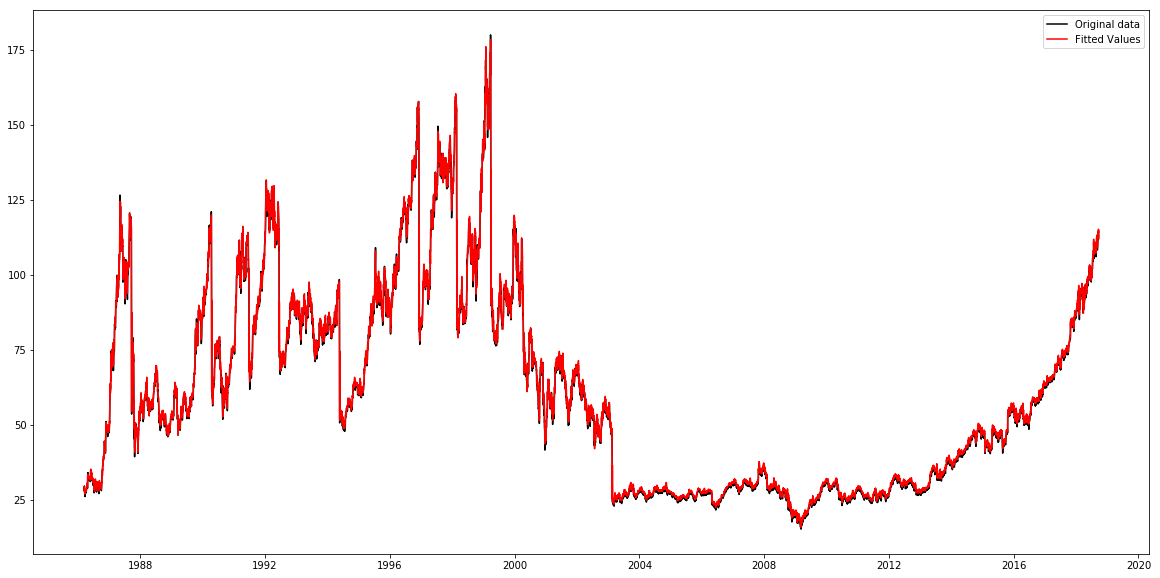

In [31]:
# Plot of orignal data and fitted values
plt.figure(figsize=(20,10))
plt.plot(acciones_final, color='black', label='Original data')
plt.plot(acciones_final_trans, color='red', label='Fitted Values')
plt.legend()

In [32]:
x = acciones_final.values
y = acciones_final_trans.values

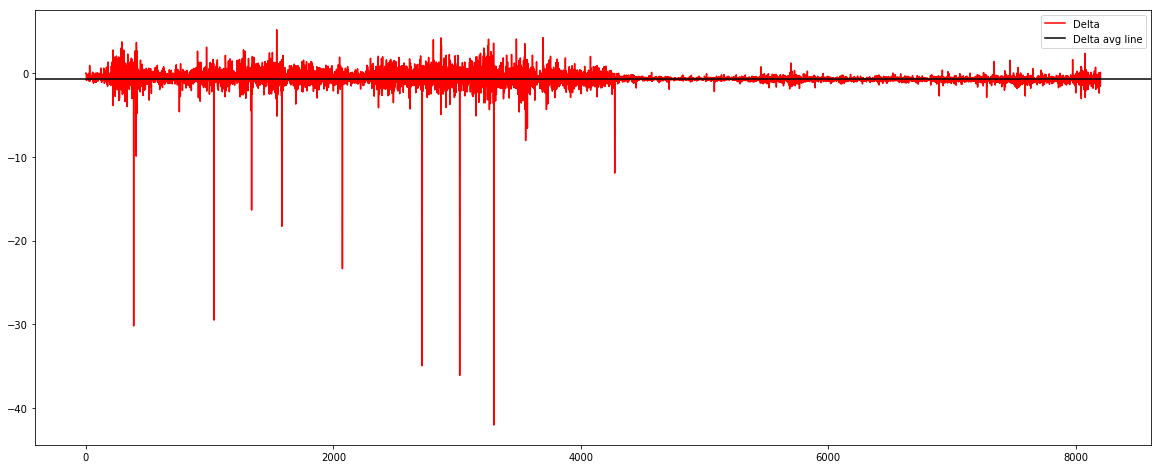

In [33]:
# Trend of error
plt.figure(figsize=(20,8))
plt.plot((x - y), color='red', label='Delta')
plt.axhline((x-y).mean(), color='black', label='Delta avg line')
plt.legend()

In [ ]:
#El error promedio parece ser de alrededor de $  por acción

In [34]:
#El último paso es crear una serie con diez valores de predicción
final_pred = []
for i in predictions:
    t = acciones_final[-1] + i
    final_pred.append(t)

In [35]:
final_pred = pd.Series(final_pred)
final_pred

0    114.984212
1    114.680061
2    111.850972
3    115.703554
4    114.805584
5    114.260043
6    113.357245
7    114.375910
8    114.202109
9    113.897958
dtype: float64